In [3]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Store filepath in a variable
housing_file = "DC_HousingN1_39.csv"
cluster_names = "clusters_names.csv"

In [5]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
# This is now a data frame
housing_df = pd.read_csv(housing_file, encoding="ISO-8859-1")
housing_df.head()

FileNotFoundError: File b'DC_HousingN1_39.csv' does not exist

In [18]:
name_df = pd.read_csv(cluster_names, encoding="ISO-8859-1")
name_df.head()

FileNotFoundError: File b'cluster_names.csv' does not exist

In [6]:
housing_df["Single-Family Homes Median Price (2016 $)"] = housing_df["Price of Single-Family Homes (2016 $)"].str.replace(',', '').dropna().astype("int")
housing_df.head()

,Cluster,Year,Sales of Single-Family Homes,Price of Single-Family Homes (2016 $),Food stamp recipients,Single-Family Homes Median Price (2016 $)
0,N1,1995,34,"410,000",NaN,410000.0
1,N1,1996,37,"365,000",NaN,365000.0
2,N1,1997,50,"501,000",NaN,501000.0
3,N1,1998,63,"538,000",NaN,538000.0
4,N1,1999,55,"522,000",NaN,522000.0


In [7]:
housing_df["Food Stamp Count"] = housing_df["Food stamp recipients"].dropna().str.replace(',', '').dropna().astype("int")
housing_df.head()

,Cluster,Year,Sales of Single-Family Homes,Price of Single-Family Homes (2016 $),Food stamp recipients,Single-Family Homes Median Price (2016 $),Food Stamp Count
0,N1,1995,34,"410,000",NaN,410000.0,NaN
1,N1,1996,37,"365,000",NaN,365000.0,NaN
2,N1,1997,50,"501,000",NaN,501000.0,NaN
3,N1,1998,63,"538,000",NaN,538000.0,NaN
4,N1,1999,55,"522,000",NaN,522000.0,NaN


In [1]:
neighborhood_stats_df = housing_df[["Cluster", "Year", "Sales of Single-Family Homes", "Single-Family Homes Median Price (2016 $)", "Food Stamp Count"]]
neighborhood_stats_df.head(20)

NameError: name 'housing_df' is not defined

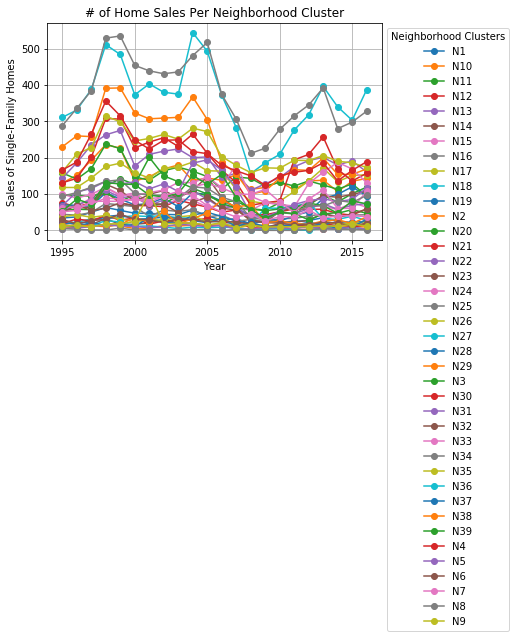

In [11]:
neighborhood_stats_df.pivot("Year", "Cluster", "Sales of Single-Family Homes").plot(kind="line", marker="o", 
    grid = True, label=['a','b','c','d','e','f']).legend(bbox_to_anchor=(1, 1), title = "Neighborhood Clusters")

# Set the label for the y-axis
plt.ylabel("Sales of Single-Family Homes")
plt.title("# of Home Sales Per Neighborhood Cluster")

#y_limit = plt.ylim(round(min(overall_scores)-3),round(max(overall_scores)+3))

#print min and max for y-axis
#print(y_limit)

#Tight fit layout
#plt.tight_layout()

# Save Figure
plt.savefig("Number_of_Homes.png")

# Show plot
plt.show()

In [ ]:
neighborhood_stats_df.pivot("Year", "Cluster", "Single-Family Homes Median Price (2016 $)").plot(kind="line", marker="o", 
    legend = "best", grid = True).legend(bbox_to_anchor=(1, 1), title = "Neighborhood Clusters")

# Set the label for the y-axis
plt.ylabel("Single-Family Homes Median Price (2016 $)")

plt.title("Median Sales Price Per Neighborhood Cluster")

#y_limit = plt.ylim(round(min(overall_scores)-3),round(max(overall_scores)+3))

#print min and max for y-axis
#print(y_limit)

#Tight fit layout
#plt.tight_layout()

# Save Figure
plt.savefig("Price_of_Homes.png")

# Show plot
plt.show()

In [ ]:
neighborhood_stats_df.pivot("Year", "Cluster", "Food Stamp Count").plot(kind="line", marker="o", 
    legend = "best", grid = True).legend(bbox_to_anchor=(1, 1), title = "Neighborhood Clusters")

# Set the label for the y-axis
plt.ylabel("Food Stamp Count")

plt.title("Food Stamp Recipients")

plt.xlim(1994,2017)
#y_limit = plt.ylim(round(min(overall_scores)-3),round(max(overall_scores)+3))

#print min and max for y-axis
#print(y_limit)

#Tight fit layout
#plt.tight_layout()

# Save Figure
plt.savefig("Food_Stamps.png")

# Show plot
plt.show()

In [ ]:
cluster_count = neighborhood_stats_df["Cluster"].nunique()
cluster_count

In [ ]:
for num in range(1,cluster_count+1):
    #Query individual column in dataframe
    #n_df = neighborhood_stats_df.query('Cluster == ["N1"]')
    
    #Make query dynamic over multiple dataframes
    n_df = neighborhood_stats_df.query(f'Cluster == ["N{num}"]')
    
    #obtain correlation between number of sales and Median home price
    ct_sales_corr = n_df["Sales of Single-Family Homes"].corr(n_df["Single-Family Homes Median Price (2016 $)"])
    
    #
    
    #print(n_df)
    print(ct_sales_corr)
    #Another way to correlate between two columns
    #print(n_df[["Sales of Single-Family Homes", "Single-Family Homes Median Price (2016 $)"]].corr())